In [1]:
# libraries for datafrane and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# libraries for clustering

import sklearn
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram

In [2]:
retail=pd.read_excel(r'C:\Users\TAHA\Downloads\Online Retail.xlsx' ,header=0)
retail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [3]:
retail.shape # rows,columns

(541909, 8)

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# Data Cleansing

df_null=round(100*(retail.isnull().sum())/len(retail),2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [7]:
retail=retail.dropna()
retail.shape

(406829, 8)

In [8]:
retail['CustomerID']=retail['CustomerID'].astype(str)

In [9]:
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [10]:
# Data Prepration
# R (Recency): Number of days since last purchase.
# F (Frequency): Number of Transactions
# M (Monetory): Total amount of transactions

In [11]:
# New Attribute: Monetory
# totalAmount= quantity * unitPrice

retail['Amount'] = retail['Quantity'] * retail['UnitPrice']
retail['Amount']

0          15.30
1          20.34
2          22.00
3          20.34
4          20.34
5          15.30
6          25.50
7          11.10
8          11.10
9          54.08
10         12.60
11         12.60
12         30.00
13          9.90
14         25.50
15         14.85
16         19.90
17         17.85
18         17.85
19         31.80
20         31.80
21         25.50
22         14.85
23         14.85
24         14.85
25         17.85
26         90.00
27         90.00
28         45.00
29         10.20
           ...  
541879     30.00
541880     15.00
541881      8.50
541882     10.08
541883     10.50
541884     15.00
541885     10.20
541886      4.68
541887     15.00
541888     11.40
541889     23.40
541890     23.60
541891     30.00
541892    214.80
541893     70.80
541894     23.40
541895     19.80
541896     19.80
541897     15.00
541898     15.00
541899     15.00
541900     15.00
541901     15.60
541902     23.40
541903     16.60
541904     10.20
541905     12.60
541906     16.

In [12]:
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [13]:
# F(Frequency): 

rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f=rfm_f.reset_index()
rfm_f.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [14]:
rfm_f.columns=['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [15]:
rfm= pd.merge(rfm_f, rfm_m, on='CustomerID', how='inner')
rfm.head(15)

,CustomerID,Frequency,Amount
0,12346.0,2,0.00
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40
5,12352.0,95,1545.41
6,12353.0,4,89.00
7,12354.0,58,1079.40
8,12355.0,13,459.40
9,12356.0,59,2811.43


In [16]:
# R(recency):

# converting date to datetime format
retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [17]:
# Knowing the last transaction
max_date=max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [18]:
# Finding difference between last transactions
retail['Diff'] = max_date - retail['InvoiceDate']
retail.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00,0 days
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00,0 days
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,15.60,0 days
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,23.40,0 days
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0 days
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0 days
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,0 days


In [19]:
# finding last transaction date of customers
rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
5,12352.0,35 days 22:13:00
6,12353.0,203 days 19:03:00
7,12354.0,231 days 23:39:00
8,12355.0,213 days 23:01:00
9,12356.0,22 days 04:10:00


In [20]:
# finding date only
rfm_p['Diff']=rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [21]:
rfm=pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency']
rfm.head()

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309


Text(0,0.5,'Range')

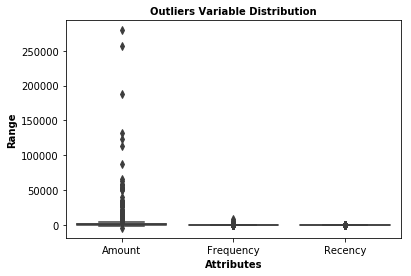

In [22]:
attributes=['Amount', 'Frequency', 'Recency']
sns.boxplot(data=rfm[attributes])
plt.title('Outliers Variable Distribution', fontsize=10, fontweight='bold')
plt.xlabel('Attributes', fontweight='bold')
plt.ylabel('Range', fontweight='bold')

In [23]:
# pd.quantile(): Return values at the given quantile over requested axis.

# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [24]:
rfm_df=rfm[['Amount', 'Frequency', 'Recency']]
scaler=StandardScaler()

rfm_df_scaled=scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [25]:
rfm_df_scaled=pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns=['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [26]:
# Applying KMeans
kmeans=KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [27]:
kmeans.labels_ #

array([2, 1, 0, ..., 2, 0, 0])

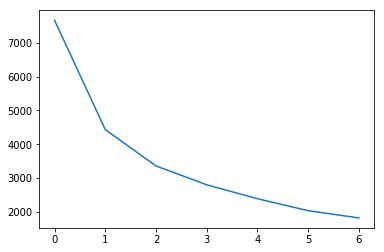

In [28]:
# Finding optimal number of clusters
# Using Elbow Method to get right number of clusters.
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)

In [29]:
# from the curve above we can see '2' has the best curve.

In [30]:
# Doing Silhoutte analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    cluster_labels= kmeans.labels_
    
    # silhoutte score
    silhouette_avg=silhouette_score(rfm_df_scaled,cluster_labels)
    print('for n-clusters={0} the silhoutte score is={1}'.format(num_clusters, silhouette_avg))



for n-clusters=2 the silhoutte score is=0.541842117113117
for n-clusters=3 the silhoutte score is=0.5084896296141937
for n-clusters=4 the silhoutte score is=0.4798089204532639
for n-clusters=5 the silhoutte score is=0.4666087666845323
for n-clusters=6 the silhoutte score is=0.41768497952422723
for n-clusters=7 the silhoutte score is=0.4173474970899706
for n-clusters=8 the silhoutte score is=0.394528820453336


In [31]:
# model with k=3
kmeans=KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [32]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0])

In [33]:
rfm['Cluster_ID']=kmeans.labels_
rfm.head()

,CustomerID,Frequency,Amount,Recency,Cluster_ID
0,12346.0,2,0.00,325,2
1,12347.0,182,4310.00,1,1
2,12348.0,31,1797.24,74,0
3,12349.0,73,1757.55,18,0
4,12350.0,17,334.40,309,2


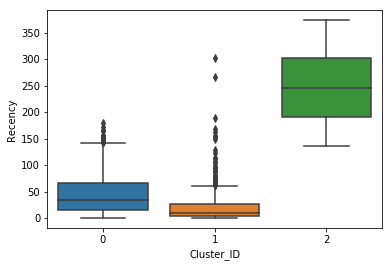

In [34]:
# Creating boxplot to visualize Cluster_ID and Recency
sns.boxplot(x='Cluster_ID', y='Recency', data=rfm)

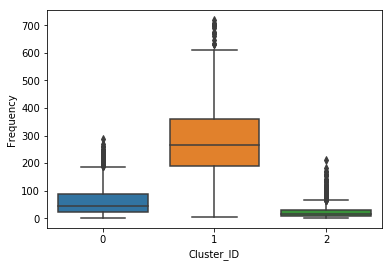

In [35]:
# Creating boxplot to visualize Cluster_ID and Frequency
sns.boxplot(x='Cluster_ID', y='Frequency', data=rfm)

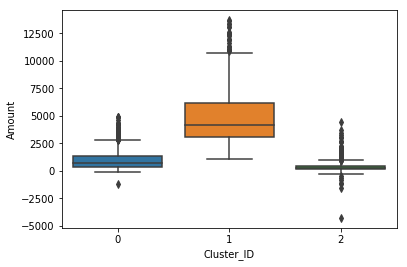

In [36]:
# Creating boxplot to visualize Cluster_ID and Monetory
sns.boxplot(x='Cluster_ID', y='Amount', data=rfm)

In [37]:
# from the above three boxplots, you can clearly see (Cluster-1) that: the customers residing in cluster 1 
# purchased most frequently, Visited the store recently ands spent handsome amount of money.
# customers residing in cluster number 2 are of least important.

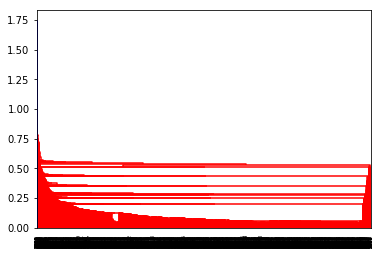

In [38]:
# Applying hierarchal clustering.

# Single linkage
mergings=linkage(rfm_df_scaled, method="single", metric="euclidean")
dendrogram(mergings)
plt.show()

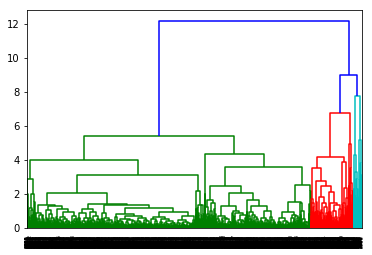

In [39]:
# complete linkage
mergings=linkage(rfm_df_scaled, method="complete", metric="euclidean")
dendrogram(mergings)
plt.show()

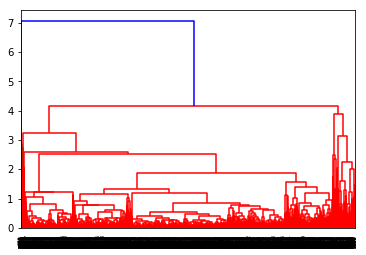

In [40]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()